In [3]:
from sklearn.datasets import load_boston
#from gplearn.genetic import SymbolicTransformer
import pandas as pd
import numpy as np
#import gplearn as gp

In [4]:
def data_prepare():
    boston = load_boston()
    boston_feature = pd.DataFrame(boston.data, columns=boston.feature_names)
    boston_label = pd.Series(boston.target).to_frame("TARGET")
    boston = pd.concat([boston_label, boston_feature], axis=1)
    return boston

data = data_prepare()

In [6]:
data.head()

,TARGET,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def plot_dist(df, feature, pic_name='dist_plot.png'):
    fcols = 2
    frows = len(feature) + 1
    print(fcols, frows)
    plt.figure(figsize=(5*fcols, 4*frows))

    i = 0
    for col in feature:
        
        i += 1
        ax = plt.subplot(frows, fcols, i)

        plt.scatter(df[col], df['TARGET'])

        plt.xlabel(col)
        plt.ylabel('price')

        i += 1
        ax = plt.subplot(frows, fcols, i)
        sns.distplot(df[col].dropna(), fit=stats.norm)
        plt.xlabel(col)

    plt.tight_layout()

2 15


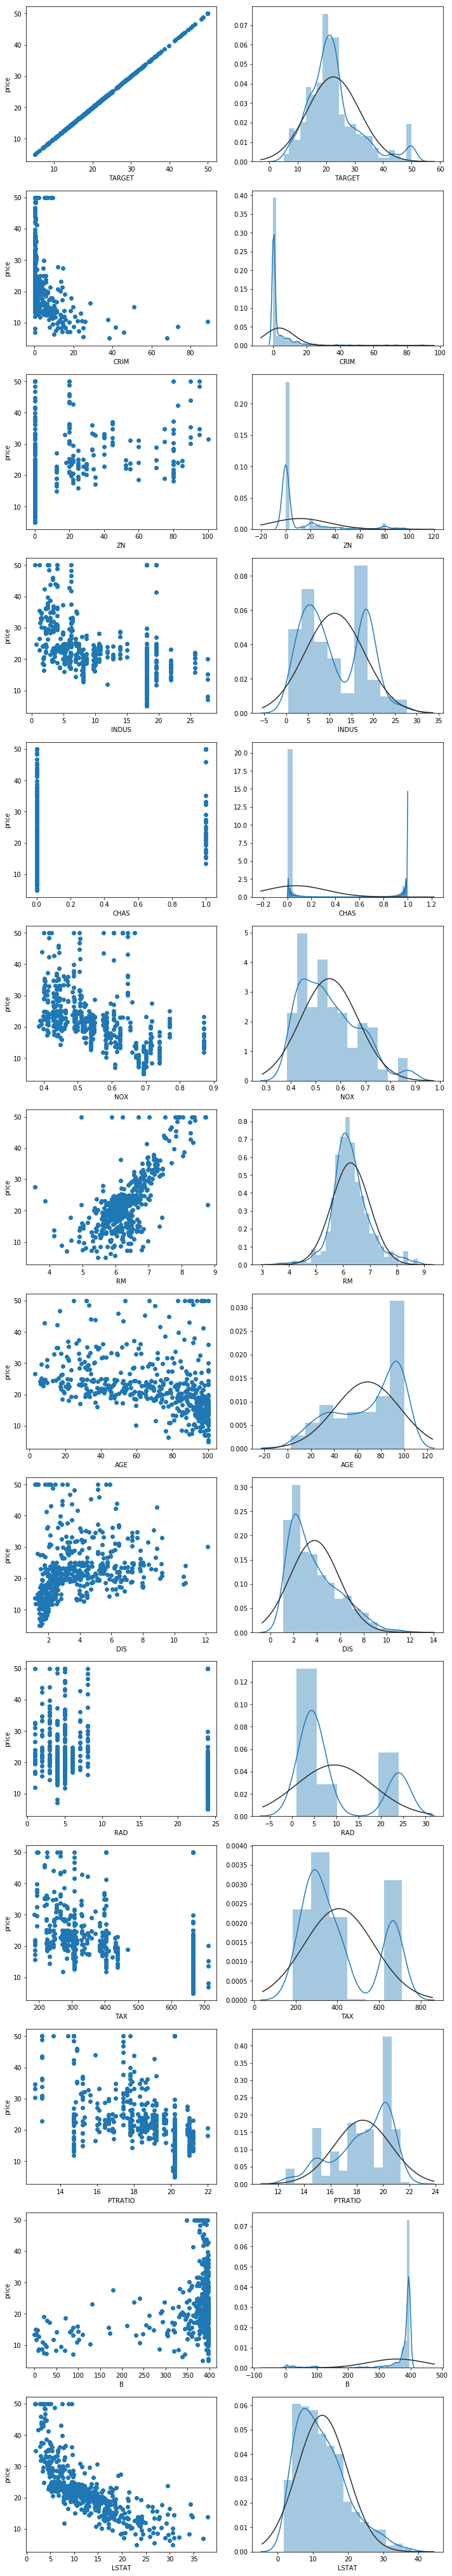

In [6]:
plot_dist(data, data.columns)

In [3]:
boston = load_boston()
boston_feature = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
boston_feature

In [6]:
def _logical(x1,x2,x3,x4):
    return np.where(x1 > x2,x3,x4)
logical = gp.functions.make_function(function = _logical,name = 'logical',arity = 4)
def _boxcox2(x1):
    with np.errstate(over='ignore', under='ignore'):
        return (np.power(x1,2)-1)/2
boxcox2 = gp.functions.make_function(function = _boxcox2,name = 'boxcox2',arity = 1)
function_set = ['add', 'sub', 'mul', 'div', 'log', 'sqrt', 'abs', 'neg','inv','sin','cos','tan', 'max', 'min',boxcox2,logical]


In [7]:
gp1 = SymbolicTransformer(generations=10, population_size=1000,
                              hall_of_fame=600, n_components=100,
                              function_set=function_set,
                              parsimony_coefficient=0.0005,
                              max_samples=0.9, verbose=1,
                              random_state=0, n_jobs=3)

In [8]:
label = data['TARGET']
train = data.drop(columns=['TARGET'])
gp1.fit(train,label)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.48         0.258958        2         0.823635         0.749252     11.55s
   1     8.09         0.562019        9         0.839827         0.796811      8.28s
   2     4.26         0.752066       10         0.854131         0.709802      9.09s
   3     4.43         0.775209       11         0.853864         0.740803      8.05s
   4     7.77         0.765599       14         0.858969          0.66138      6.07s
   5     9.33         0.774471       14         0.860391         0.743865      5.14s
   6    10.71         0.787419        8         0.861393         0.706797      3.98s
   7    10.15         0.766087       12         0.861202         0.670839      2.79s
   8     9.85         0.779226       14         0.862884         0.681261  

SymbolicTransformer(const_range=(-1.0, 1.0), feature_names=None,
          function_set=['add', 'sub', 'mul', 'div', 'log', 'sqrt', 'abs', 'neg', 'inv', 'sin', 'cos', 'tan', 'max', 'min', <gplearn.functions._Function object at 0x0000000011145358>, <gplearn.functions._Function object at 0x00000000111453C8>],
          generations=10, hall_of_fame=600, init_depth=(2, 6),
          init_method='half and half', low_memory=False, max_samples=0.9,
          metric='pearson', n_components=100, n_jobs=3, p_crossover=0.9,
          p_hoist_mutation=0.01, p_point_mutation=0.01,
          p_point_replace=0.05, p_subtree_mutation=0.01,
          parsimony_coefficient=0.0005, population_size=1000,
          random_state=0, stopping_criteria=1.0, tournament_size=20,
          verbose=1, warm_start=False)

In [15]:
new_df2 = gp1.transform(train)

In [20]:
for program in gp1:
    print(program)
    print(program.raw_fitness_)


inv(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), X10), X12))))
0.8738451926476594
log(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), add(sub(X12, log(X8)), X10)), X12))))
0.8687005971721341
log(log(log(mul(X12, X10))))
0.8666678874783404
log(log(log(sub(sqrt(X6), add(add(X10, X10), mul(X12, X10))))))
0.8653280637489179
log(log(sub(sqrt(X6), add(add(sub(X12, max(log(mul(X12, X10)), cos(X7))), X10), X12))))
0.8652635697850892
log(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), X10), X12))))
0.8632434789050442
log(log(log(sub(sqrt(X6), add(add(sub(X12, log(log(max(mul(X12, X10), log(X12))))), X10), X12)))))
0.8610495206225806
log(log(max(mul(X12, X10), log(abs(log(sub(sqrt(X6), mul(X12, X10))))))))
0.8604886463800123
log(log(sub(sqrt(X6), add(add(sub(X12, max(log(log(mul(X12, X10))), cos(X7))), X10), X12))))
0.8600528688444621
log(log(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), X10), X12)))))
0.8586229724519209
log(log(log(sub(sqrt(X6), add(add(sub(X12, inv(log(mul(X12, X10)))), X10), X12))))

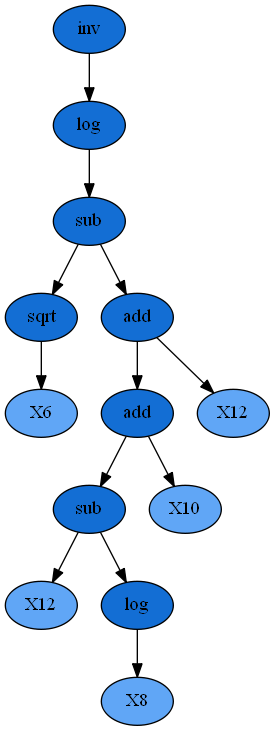

In [21]:
from IPython.display import Image
import pydotplus
graph = gp1._best_programs[0].export_graphviz()
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())

In [28]:
from IPython.display import Image
import pydotplus

In [31]:
for program in gp1:
    print(program)

inv(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), X10), X12))))
log(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), add(sub(X12, log(X8)), X10)), X12))))
log(log(log(mul(X12, X10))))
log(log(log(sub(sqrt(X6), add(add(X10, X10), mul(X12, X10))))))
log(log(sub(sqrt(X6), add(add(sub(X12, max(log(mul(X12, X10)), cos(X7))), X10), X12))))
log(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), X10), X12))))
log(log(log(sub(sqrt(X6), add(add(sub(X12, log(log(max(mul(X12, X10), log(X12))))), X10), X12)))))
log(log(max(mul(X12, X10), log(abs(log(sub(sqrt(X6), mul(X12, X10))))))))
log(log(sub(sqrt(X6), add(add(sub(X12, max(log(log(mul(X12, X10))), cos(X7))), X10), X12))))
log(log(log(sub(sqrt(X6), add(add(sub(X12, log(X8)), X10), X12)))))
log(log(log(sub(sqrt(X6), add(add(sub(X12, inv(log(mul(X12, X10)))), X10), X12)))))
inv(log(sub(sqrt(X6), add(add(sub(X12, log(mul(X12, X10))), X10), X12))))
log(inv(log(sub(sqrt(X6), add(add(sub(X12, sqrt(sqrt(mul(X12, X10)))), X10), X12)))))
log(log(sub(sqrt(X6), add(ad